In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

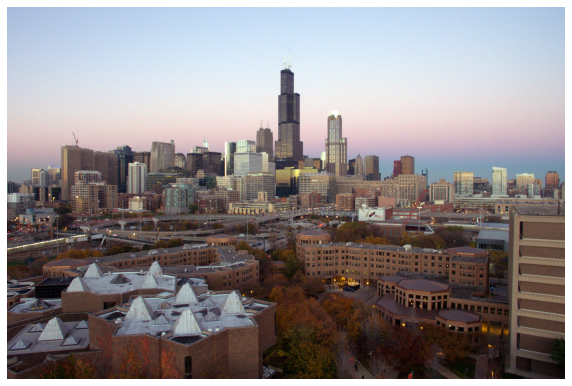

In [4]:
img_bld = cv2.imread('blds.png')
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bld, cv2.COLOR_BGR2RGB))

# Extract Axis Aligned Patch

In [5]:
'''
Part(a) axis aligned patch
'''
def axis_aligned_patch(image, center, height, width, ch = 3):    
    patch = np.empty([width, height, ch])
    w,h = image.shape[:2]
    # insert code to crop the image at the center with height width specified

    img_ind_w = int(center[1] - (width/2))
    img_ind_h = int(center[0] - (height/2))


    print(img_ind_w, img_ind_h)

    for i in range(width):
        for j in range(height):
            if( img_ind_w + i >=w or img_ind_h + j >= h):
                patch[i][j] = 0
            elif(img_ind_w + i < 0 or img_ind_h + j < 0):
                patch[i][j] = 0
            else:
                patch[i][j] = image[img_ind_w + i][img_ind_h + j]

    return patch

1200 1800
499 799


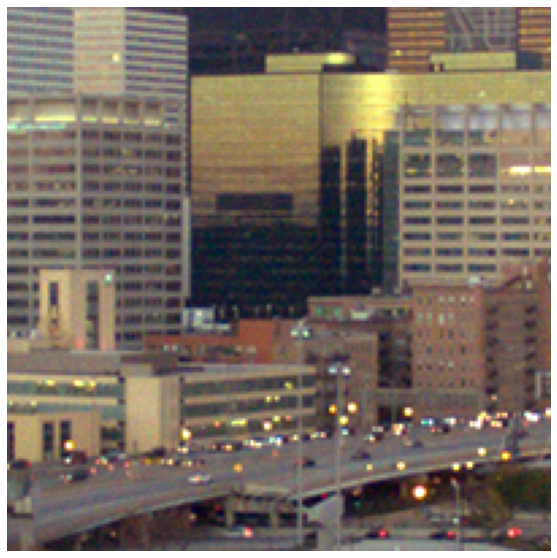

In [6]:
w,h = img_bld.shape[:2]
print(w, h)

intK = 100

patch = axis_aligned_patch(img_bld, [h/2 ,w/2], (2* intK+1), (2* intK+1))

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.uint8(patch), cv2.COLOR_BGR2RGB))

In [7]:
'''
Part(b) oriented patch extraction on default canvas
'''
def rotate_image(image, center, angle):
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)  
    out_shape = np.asarray(image.shape[1::-1])
    result = cv2.warpAffine(image, rot_mat, out_shape)
    return result

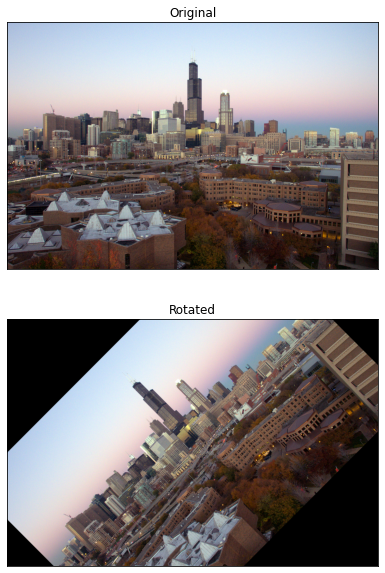

In [8]:
#rot_center = tuple(0.1*np.array(img_bld.shape[1::-1]) / 2)

rot_center = (h/2, w/2)
rot_angle = 45
dst = rotate_image(img_bld,rot_center,rot_angle)

plt.figure(figsize = [20, 10])
plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(img_bld, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Rotated'), plt.xticks([]), plt.yticks([])
plt.show()

### Get rotated patch

499 799


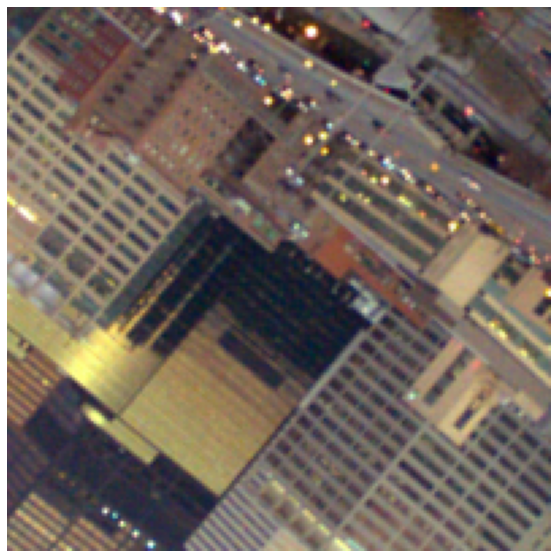

In [78]:
theta = 140
intK = 100
center = [h/2 ,w/2]

dst = rotate_image(img_bld,center,theta)
patch = axis_aligned_patch(dst, center, (2* intK+1), (2* intK+1))


plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.uint8(patch), cv2.COLOR_BGR2RGB))

In [82]:
'''
Part(b) oriented patch extraction on sufficiently sized canvas
'''

def rotate_bound(image, center, angleInDegrees):
    # grab the dimensions of the image and then determine the
    # center
    print(center)
    
    (h, w) = image.shape[:2]
    print('width:',w,'\n','height:',h)
    cX = center[0]
    cY = center[1]
    
    # calculate the rotation matrix in the same way as before
    M = cv2.getRotationMatrix2D(center, angleInDegrees, 1.0)

    angle_rad = angleInDegrees * (np.pi / 180)
    
    # Part c(i) compute the new dimensions of the canvas nH, nW (this is H0, W0 is the assignment pdf)     
    nW = (h * np.sin(angle_rad)) + (w * np.cos(angle_rad))
    nH = (h * np.cos(angle_rad)) + (w * np.sin(angle_rad))
    
    # Part c(ii) adjust the rotation matrix to take into account translation by 
    # calculating vertices of given image and patch

    topmost = (nW / 2) - cX
    leftmost = (nH / 2) - cY
    
    newpatch_coords = np.zeros([2,4])
    
    # Part c(iii) adjust the rotation matrix using T0    
    M[0,2] += topmost #translate x center to topmost
    M[1,2] += leftmost #translate y center to leftmost
       

    warped_img = cv2.warpAffine(image, M, (int(nW), int(nH)))
    print('nW=',nW,'\n','nH=',nH,'\n','cX=',cX,'\ncY=',cY,'\nM=',M)
    # perform the actual rotation and return the image
    return warped_img, newpatch_coords


[1000, 60]
width: 1800 
 height: 1200
nW= 1981.0317686222909 
 nH= 1494.3360234151241 
 cX= 1000 
cY= 60 
M= [[ 9.84807753e-01  1.73648178e-01 -4.71075936e+00]
 [-1.73648178e-01  9.84807753e-01  8.61727724e+02]]


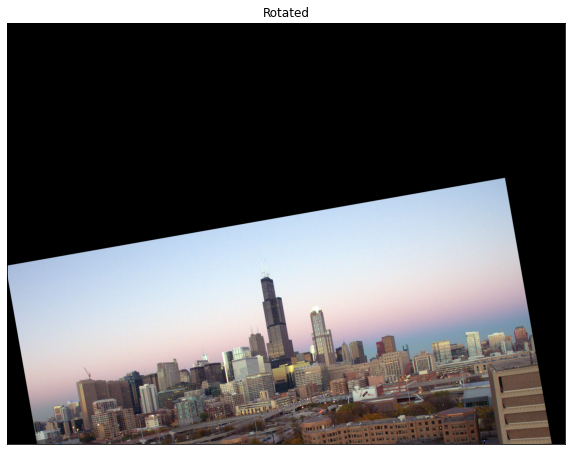

In [84]:
rot_center = [1000 ,60]
rot_angle = 10

dst, _ = rotate_bound(img_bld,rot_center,rot_angle)

plt.figure(figsize = [10, 10])
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Rotated'), plt.xticks([]), plt.yticks([])
plt.show()

5 5


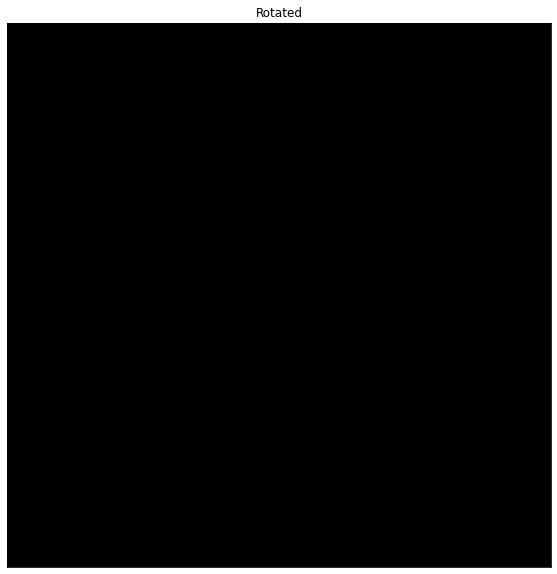

In [12]:
# Part c(iv) insert code to extract patch from this new canvas

patch = axis_aligned_patch(dst, np.asarray([10,10]), 10, 10)
plt.figure(figsize = [10, 10])
plt.imshow(cv2.cvtColor(patch.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Rotated'), plt.xticks([]), plt.yticks([])
plt.show()